In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.insert(0,'/Users/antonbaleatolizancos/Projects/lensing_rec_biases')
#sys.path.insert(1,'/Users/antonbaleatolizancos/anaconda/envs/lensing_biases_python3_CIBbranch/lib/python3.8/site-packages/')

import numpy as np
import matplotlib.pyplot as plt
from lensing_rec_biases_code import tools as tls
from lensing_rec_biases_code import qest
from lensing_rec_biases_code import biases


IMPORT ERROR: /Users/antonbaleatolizancos/Software/Quicklens-with-fixes/quicklens/mpi.py (No module named 'pypar'). Could not load pbs or pypar. MPI will not be used.
IMPORT ERROR: /Users/antonbaleatolizancos/Software/Quicklens-with-fixes/quicklens/shts/__init__.py (No module named 'fsht'). Try running 'python setup.py install' or 'python setup.py build_ext --inplace' from the quicklens directory.








Initialise experiment object

In [2]:
nlev_t = 18. # uK arcmin
beam_size = 1. #arcmin
lmax = 3000 # Maximum ell for the reconstruction
freq_GHz = 143.#217. 

# Initialise experiments with various different mass cuts
SO_5e15 = qest.experiment(6., 1.4, lmax, massCut_Mvir=5e15, freq_GHz=freq_GHz)
SPT_5e15 = qest.experiment(nlev_t, beam_size, lmax, massCut_Mvir=5e15, freq_GHz=freq_GHz)
SPT_5e14 = qest.experiment(nlev_t, beam_size, lmax,  massCut_Mvir=5e14, freq_GHz=freq_GHz)
SPT_1e14 = qest.experiment(nlev_t, beam_size, lmax,  massCut_Mvir=1e14, freq_GHz=freq_GHz)

In [8]:
SPT_5e15_for2ndary = qest.experiment(nlev_t, beam_size, lmax, massCut_Mvir=5e15, freq_GHz=freq_GHz)
experiment_2ndarybispec = SPT_5e15_for2ndary

One can later inspect the properties by doing

In [3]:
print(SPT_5e15)
print(SPT_5e14)
print(SPT_1e14)

Mass Cut: 5.00e+15  lmax: 3000  Beam FWHM: 1.00 Noise (uK arcmin): 18.00  Freq (GHz): 143.00
Mass Cut: 5.00e+14  lmax: 3000  Beam FWHM: 1.00 Noise (uK arcmin): 18.00  Freq (GHz): 143.00
Mass Cut: 1.00e+14  lmax: 3000  Beam FWHM: 1.00 Noise (uK arcmin): 18.00  Freq (GHz): 143.00


Initialise halo model calculator

In [3]:
# This should roughly match the cosmology in Nick's tSZ papers
cosmoParams = {'As':2.4667392631170437e-09,'ns':.96,'omch2':(0.25-.043)*.7**2,'ombh2':0.044*.7**2,'H0':70.} #Note that for now there is still cosmology dpendence in the cls defined within the experiment class

z_max = 3 #3
nZs = 30 #50
nMasses = 30 #30

# Set CIB halo model
cib_model='planck13'#'vierro'

# Initialise a halo model object for the calculation, using mostly default parameters
hm_calc = biases.hm_framework(cosmoParams=cosmoParams, nZs=nZs, nMasses=nMasses, cib_model=cib_model, z_max=z_max)

In [9]:
hm_calc_for2ndary = biases.hm_framework(cosmoParams=cosmoParams, nZs=3, nMasses=3, cib_model=cib_model, z_max=z_max)

Again, we can print out its properties

In [10]:
print(hm_calc)

M_min: 2.00e+13  M_max: 5.00e+16  n_Masses: 30
  z_min: 0.07  z_max: 5.00  n_zs: 50
  Mass function: sheth-torman  Mass definition: vir


# Calculate the biases

Run the main function for each of the mass cuts, and for either the tsz or cib calculation, using the FFTlog approach

In [ ]:
# Calculate secondary bispectrum bias? Note that this is a lot slower that the other implemented terms
get_secondary_bispec_bias = False

In [4]:


hm_calc.get_tsz_bias(SPT_5e15, get_secondary_bispec_bias=get_secondary_bispec_bias)
#hm_calc.get_cib_bias(SPT_5e15, get_secondary_bispec_bias=get_secondary_bispec_bias)

AttributeError: 'hm_framework' object has no attribute 'get_tsz_bias'

In [10]:
get_secondary_bispec_bias = True


hm_calc_for2ndary.get_tsz_bias(SPT_5e15_for2ndary, get_secondary_bispec_bias=get_secondary_bispec_bias)

In [6]:
hm_calc.get_tsz_bias(SPT_5e15, get_secondary_bispec_bias=get_secondary_bispec_bias)
hm_calc.get_tsz_bias(SPT_5e14, get_secondary_bispec_bias=get_secondary_bispec_bias)
hm_calc.get_tsz_bias(SPT_1e14, get_secondary_bispec_bias=get_secondary_bispec_bias)

hm_calc.get_cib_bias(SPT_5e15, get_secondary_bispec_bias=get_secondary_bispec_bias)
hm_calc.get_cib_bias(SPT_5e14, get_secondary_bispec_bias=get_secondary_bispec_bias)
hm_calc.get_cib_bias(SPT_1e14, get_secondary_bispec_bias=get_secondary_bispec_bias)

hm_calc.get_mixed_biases(SPT_5e15, get_secondary_bispec_bias=get_secondary_bispec_bias)
hm_calc.get_mixed_biases(SPT_5e14, get_secondary_bispec_bias=get_secondary_bispec_bias)
hm_calc.get_mixed_biases(SPT_1e14, get_secondary_bispec_bias=get_secondary_bispec_bias)

Plot the biases

In [5]:
which_bias = 'tsz' # 'tsz' or 'cib' or 'mixed'
experiment = SPT_5e15

# Break down contributions into n-halo terms?
breakdown = False

In [21]:
#text width and height of PhD thesis
textwidth =  6.05 #inches
textheight = 8.77 #inches

plotting_params = {'font.size':8, 'axes.labelsize':8, 'xtick.labelsize':8, 'ytick.labelsize':8, \
                      'font.family':'serif', 'text.usetex':True, 'figure.figsize': [textwidth, textwidth],
                   'axes.titlesize':8, 'lines.linewidth':0.7}

plt.rcParams.update(plotting_params)

/Users/antonbaleatolizancos/Desktop/THESIS/phd_thesis/Chapter4/plots_lensing_rec_biases/tsz_kappabiases_cosmoblender_lmax3000_withsecbispecbias_nzs30_nms30.pdf


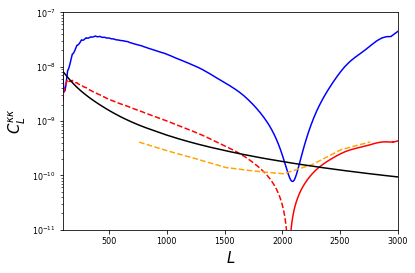

In [30]:
plt.figure()
title=''

scaling = experiment.biases['ells']**4 /4.
if get_secondary_bispec_bias:
    # TODO: a factor of 1/2 would make the 2ndary bispec agree better with expectations
    scaling_second_bispec_bias = experiment_2ndarybispec.biases['second_bispec_bias_ells']**4 /4.
    scaling_second_bispec_bias[:3] = np.nan

# Split into negative and positive parts for plotting convenience
prim_bispec_1h_pos, prim_bispec_1h_neg = tls.split_positive_negative(experiment.biases[which_bias]['prim_bispec']['1h'])
prim_bispec_2h_pos, prim_bispec_2h_neg = tls.split_positive_negative(experiment.biases[which_bias]['prim_bispec']['2h'])
prim_bispec_tot_pos, prim_bispec_tot_neg = tls.split_positive_negative(experiment.biases[which_bias]['prim_bispec']['2h']+experiment.biases[which_bias]['prim_bispec']['1h'])

trispec_1h_pos, trispec_1h_neg = tls.split_positive_negative(experiment.biases[which_bias]['trispec']['1h'])
trispec_2h_pos, trispec_2h_neg = tls.split_positive_negative(experiment.biases[which_bias]['trispec']['2h'])
trispec_tot_pos, trispec_tot_neg = tls.split_positive_negative(experiment.biases[which_bias]['trispec']['2h']+ experiment.biases[which_bias]['trispec']['1h'])

if get_secondary_bispec_bias:
    sec_bispec_1h_pos, sec_bispec_1h_neg = tls.split_positive_negative(experiment_2ndarybispec.biases[which_bias]['second_bispec']['1h'])
    #FIXME: for now, ony 1h term for secondary bispec bias
    sec_bispec_tot_pos, sec_bispec_tot_neg = tls.split_positive_negative ( 0 +experiment_2ndarybispec.biases[which_bias]['second_bispec']['1h'])


plt.plot(experiment.biases['ells'], scaling * trispec_tot_pos, color='b', label=r'{} trispec. bias, tot '.format(which_bias))
plt.plot(experiment.biases['ells'], scaling * trispec_tot_neg, color='b', ls='--')

if breakdown:
    title='_withbreakdown'
    plt.plot(experiment.biases['ells'], scaling * trispec_1h_pos, color='b', label=r'{} trispec. bias, 1h '.format(which_bias), ls=':')
    plt.plot(experiment.biases['ells'], scaling * trispec_1h_neg, color='b', ls=':')

    plt.plot(experiment.biases['ells'], scaling * trispec_2h_pos, color='b', label=r'{} trispec. bias, 2h '.format(which_bias), ls='-.')
    plt.plot(experiment.biases['ells'], scaling * trispec_2h_neg, color='b', ls='-.')

plt.plot(experiment.biases['ells'], scaling * prim_bispec_tot_pos, color='r',label=r'{} prim. bispec. bias, tot'.format(which_bias))
plt.plot(experiment.biases['ells'], scaling * prim_bispec_tot_neg, color='r', ls='--')

if breakdown:
    plt.plot(experiment.biases['ells'], scaling * prim_bispec_1h_pos, color='r', label=r'{} prim. bispec. bias, 1h '.format(which_bias), ls=':')
    plt.plot(experiment.biases['ells'], scaling * prim_bispec_1h_neg, color='r', ls=':')

    plt.plot(experiment.biases['ells'], scaling * prim_bispec_2h_pos, color='r', label=r'{} prim. bispec. bias, 2h '.format(which_bias), ls='-.')
    plt.plot(experiment.biases['ells'], scaling * prim_bispec_2h_neg, color='r', ls='-.')

if get_secondary_bispec_bias:
    plt.plot(experiment_2ndarybispec.biases['second_bispec_bias_ells'], scaling_second_bispec_bias * sec_bispec_tot_pos, color='orange',label=r'{} sec. bispec. bias, tot'.format(which_bias))
    plt.plot(experiment_2ndarybispec.biases['second_bispec_bias_ells'], scaling_second_bispec_bias * sec_bispec_tot_neg, color='orange', ls='--')

if breakdown:
    plt.plot(experiment.biases['second_bispec_bias_ells'], scaling_second_bispec_bias * sec_bispec_1h_pos, color='orange', label=r'{} sec. bispec. bias, 1h '.format(which_bias), ls=':')
    plt.plot(experiment.biases['second_bispec_bias_ells'], scaling_second_bispec_bias * sec_bispec_1h_neg, color='orange', ls=':')

    #plt.plot(experiment.biases['second_bispec_bias_ells'], scaling_second_bispec_bias * sec_bispec_2h_pos, color='gold', label=r'{} sec. bispec. bias, 2h '.format(which_bias), ls='-.')
    #plt.plot(experiment.biases['second_bispec_bias_ells'], scaling_second_bispec_bias * sec_bispec_2h_neg, color='gold', ls='-.')
    
#plt.annotate(r'$0.05\,C_L^{\kappa \kappa}$', (2500,4e-11), rotation=-8)
plt.plot(experiment.cl_unl.ls, 0.05* experiment.cl_unl.ls**4 * experiment.cl_unl.clpp /4.,'k')
plt.yscale('log')
#plt.legend(ncol=1, columnspacing=1)
plt.ylabel(r'$C_L^{\kappa\kappa}$',fontsize=15)
plt.xlabel(r'$L$',fontsize=15)
#plt.title(r'l$_{\mathrm{max}}=$'+str(lmax)+'$, M_{\mathrm{max}}=$'+'{:.2E}'.format(experiment.massCut), fontsize=10)
plt.xlim([100,3000])
plt.ylim([1e-11,1e-7])

ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=8)

#plt.savefig('../plots/tsz_bias_for_diff_mass_cuts/1D_reconstructions/biases_lmax{}_masscut{}.pdf'.format(lmax, '1e14'))
thesis_dir = '/Users/antonbaleatolizancos/Desktop/THESIS/phd_thesis/Chapter4/plots_lensing_rec_biases/'

if get_secondary_bispec_bias:
    plt.savefig(thesis_dir+'{}_biases_cosmoblender_lmax{}{}_withsecbispecbias_nzs{}_nms{}.pdf'.format(which_bias, lmax, title, nZs, nMasses), bbox_inches='tight', dpi=1000)
    print(thesis_dir+'{}_kappabiases_cosmoblender_lmax{}{}_withsecbispecbias_nzs{}_nms{}.pdf'.format(which_bias, lmax, title, nZs, nMasses))
else:
    plt.savefig(thesis_dir+'{}_kappabiases_cosmoblender_lmax{}{}.pdf'.format(which_bias, lmax, title), bbox_inches='tight')



/Users/antonbaleatolizancos/Desktop/THESIS/phd_thesis/Chapter4/plots_lensing_rec_biases/tsz_biases_cosmoblender_lmax3000_withsecbispecbias_nzs30_nms30.pdf


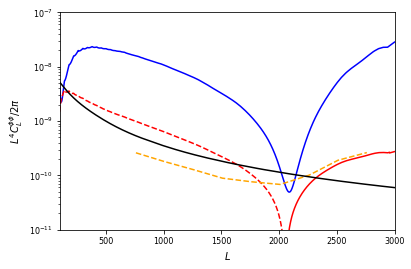

In [27]:
plt.figure()
title=''

scaling = experiment.biases['ells']**4 /(2*np.pi)
if get_secondary_bispec_bias:
    # TODO: a factor of 1/2 would make the 2ndary bispec agree better with expectations
    scaling_second_bispec_bias = experiment_2ndarybispec.biases['second_bispec_bias_ells']**4 /4.
    scaling_second_bispec_bias[:3] = np.nan

# Split into negative and positive parts for plotting convenience
prim_bispec_1h_pos, prim_bispec_1h_neg = tls.split_positive_negative(experiment.biases[which_bias]['prim_bispec']['1h'])
prim_bispec_2h_pos, prim_bispec_2h_neg = tls.split_positive_negative(experiment.biases[which_bias]['prim_bispec']['2h'])
prim_bispec_tot_pos, prim_bispec_tot_neg = tls.split_positive_negative(experiment.biases[which_bias]['prim_bispec']['2h']+experiment.biases[which_bias]['prim_bispec']['1h'])

trispec_1h_pos, trispec_1h_neg = tls.split_positive_negative(experiment.biases[which_bias]['trispec']['1h'])
trispec_2h_pos, trispec_2h_neg = tls.split_positive_negative(experiment.biases[which_bias]['trispec']['2h'])
trispec_tot_pos, trispec_tot_neg = tls.split_positive_negative(experiment.biases[which_bias]['trispec']['2h']+ experiment.biases[which_bias]['trispec']['1h'])

if get_secondary_bispec_bias:
    sec_bispec_1h_pos, sec_bispec_1h_neg = tls.split_positive_negative(experiment_2ndarybispec.biases[which_bias]['second_bispec']['1h'])
    #FIXME: for now, ony 1h term for secondary bispec bias
    sec_bispec_tot_pos, sec_bispec_tot_neg = tls.split_positive_negative ( 0 +experiment_2ndarybispec.biases[which_bias]['second_bispec']['1h'])


plt.plot(experiment.biases['ells'], scaling * trispec_tot_pos, color='b', label=r'{} trispec. bias, tot '.format(which_bias))
plt.plot(experiment.biases['ells'], scaling * trispec_tot_neg, color='b', ls='--')

if breakdown:
    title='_withbreakdown'
    plt.plot(experiment.biases['ells'], scaling * trispec_1h_pos, color='b', label=r'{} trispec. bias, 1h '.format(which_bias), ls=':')
    plt.plot(experiment.biases['ells'], scaling * trispec_1h_neg, color='b', ls=':')

    plt.plot(experiment.biases['ells'], scaling * trispec_2h_pos, color='b', label=r'{} trispec. bias, 2h '.format(which_bias), ls='-.')
    plt.plot(experiment.biases['ells'], scaling * trispec_2h_neg, color='b', ls='-.')

plt.plot(experiment.biases['ells'], scaling * prim_bispec_tot_pos, color='r',label=r'{} prim. bispec. bias, tot'.format(which_bias))
plt.plot(experiment.biases['ells'], scaling * prim_bispec_tot_neg, color='r', ls='--')

if breakdown:
    plt.plot(experiment.biases['ells'], scaling * prim_bispec_1h_pos, color='r', label=r'{} prim. bispec. bias, 1h '.format(which_bias), ls=':')
    plt.plot(experiment.biases['ells'], scaling * prim_bispec_1h_neg, color='r', ls=':')

    plt.plot(experiment.biases['ells'], scaling * prim_bispec_2h_pos, color='r', label=r'{} prim. bispec. bias, 2h '.format(which_bias), ls='-.')
    plt.plot(experiment.biases['ells'], scaling * prim_bispec_2h_neg, color='r', ls='-.')

if get_secondary_bispec_bias:
    plt.plot(experiment_2ndarybispec.biases['second_bispec_bias_ells'], scaling_second_bispec_bias * sec_bispec_tot_pos, color='orange',label=r'{} sec. bispec. bias, tot'.format(which_bias))
    plt.plot(experiment_2ndarybispec.biases['second_bispec_bias_ells'], scaling_second_bispec_bias * sec_bispec_tot_neg, color='orange', ls='--')

if breakdown:
    plt.plot(experiment.biases['second_bispec_bias_ells'], scaling_second_bispec_bias * sec_bispec_1h_pos, color='orange', label=r'{} sec. bispec. bias, 1h '.format(which_bias), ls=':')
    plt.plot(experiment.biases['second_bispec_bias_ells'], scaling_second_bispec_bias * sec_bispec_1h_neg, color='orange', ls=':')

    #plt.plot(experiment.biases['second_bispec_bias_ells'], scaling_second_bispec_bias * sec_bispec_2h_pos, color='gold', label=r'{} sec. bispec. bias, 2h '.format(which_bias), ls='-.')
    #plt.plot(experiment.biases['second_bispec_bias_ells'], scaling_second_bispec_bias * sec_bispec_2h_neg, color='gold', ls='-.')
    
#plt.annotate(r'$0.05\,C_L^{\kappa \kappa}$', (2500,4e-11), rotation=-8)
plt.plot(experiment.cl_unl.ls, 0.05* experiment.cl_unl.ls**4 * experiment.cl_unl.clpp /(2*np.pi),'k')
plt.yscale('log')
#plt.legend(ncol=1, columnspacing=1)
plt.ylabel(r'$L^4 C_L^{\phi\phi}/ 2\pi$',fontsize=10)
plt.xlabel(r'$L$',fontsize=10)
#plt.title(r'l$_{\mathrm{max}}=$'+str(lmax)+'$, M_{\mathrm{max}}=$'+'{:.2E}'.format(experiment.massCut), fontsize=10)
plt.xlim([100,3000])
plt.ylim([1e-11,1e-7])

ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=8)

#plt.savefig('../plots/tsz_bias_for_diff_mass_cuts/1D_reconstructions/biases_lmax{}_masscut{}.pdf'.format(lmax, '1e14'))
thesis_dir = '/Users/antonbaleatolizancos/Desktop/THESIS/phd_thesis/Chapter4/plots_lensing_rec_biases/'

if get_secondary_bispec_bias:
    plt.savefig(thesis_dir+'{}_biases_cosmoblender_lmax{}{}_withsecbispecbias_nzs{}_nms{}.pdf'.format(which_bias, lmax, title, nZs, nMasses), bbox_inches='tight', dpi=1000)
    print(thesis_dir+'{}_biases_cosmoblender_lmax{}{}_withsecbispecbias_nzs{}_nms{}.pdf'.format(which_bias, lmax, title, nZs, nMasses))
else:
    plt.savefig(thesis_dir+'{}_biases_cosmoblender_lmax{}{}.pdf'.format(which_bias, lmax, title), bbox_inches='tight')


We can save the dictionary of biases to file as

In [8]:
experiment.save_biases()

and later retrieve them as

In [9]:
dict_of_biases = qest.load_dict_of_biases()

Successfully loaded experiment object with properties:

{'ells': array([   0,    1,    2, ..., 2998, 2999, 3000]), 'second_bispec_bias_ells': array([  10,  260,  510,  760, 1010, 1260, 1510, 1760, 2010, 2260, 2510,
       2760]), 'tsz': {'trispec': {'1h': array([0.00000000e+00+0.j, 1.44729161e-10+0.j, 1.39868017e-10+0.j, ...,
       3.77057677e-21+0.j, 3.77861534e-21+0.j, 3.78666249e-21+0.j]), '2h': array([0.00000000e+00+0.00000000e+00j, 1.34428370e-11-6.18352357e-26j,
       2.05909862e-11-9.47157568e-26j, ...,
       6.77973948e-26+1.98553893e-43j, 6.78863674e-26+1.98814461e-43j,
       6.79753182e-26+1.99074966e-43j])}, 'prim_bispec': {'1h': array([           nan           +nanj, 1.42341421e-10-3.27375660e-25j,
       4.61391179e-11-1.06116857e-25j, ...,
       2.23644517e-23+3.27486695e-41j, 2.23634089e-23+3.27471426e-41j,
       2.23623480e-23+3.27455891e-41j]), '2h': array([           nan           +nanj, 9.54102618e-10-2.19437162e-24j,
       5.09599960e-10-1.17204551e-24j, ...,

We can also use the standard Quicklens implementation of the QEs instead of FFTlog

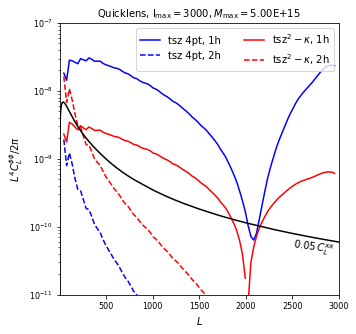

In [11]:
plt.figure(figsize=(5,5))
scaling = experiment.biases['ells']**4 /(2*np.pi)

flat_sky_correction = 1

plt.plot(experiment.biases['ells'][experiment.biases[which_bias]['trispec']['1h']>0],flat_sky_correction**2 *(scaling * experiment.biases[which_bias]['trispec']['1h'])[experiment.biases[which_bias]['trispec']['1h']>0],color='b',label=r'{} 4pt, 1h '.format(which_bias))

plt.plot(experiment.biases['ells'][experiment.biases[which_bias]['trispec']['2h']>0],flat_sky_correction**2 *(scaling * experiment.biases[which_bias]['trispec']['2h'])[experiment.biases[which_bias]['trispec']['2h']>0],color='b',label=r'{} 4pt, 2h '.format(which_bias),ls='--')
plt.plot(experiment.biases['ells'][experiment.biases[which_bias]['trispec']['2h']<0],-flat_sky_correction**2 *(scaling * experiment.biases[which_bias]['trispec']['2h'])[experiment.biases[which_bias]['trispec']['2h']<0],color='b',ls='--')

plt.plot(experiment.biases['ells'][experiment.biases[which_bias]['prim_bispec']['1h']>0],flat_sky_correction *(scaling *experiment.biases[which_bias]['prim_bispec']['1h'])[experiment.biases[which_bias]['prim_bispec']['1h']>0],color='r',label=r'{}$^2-\kappa$, 1h'.format(which_bias))
plt.plot(experiment.biases['ells'][experiment.biases[which_bias]['prim_bispec']['1h']<0],-flat_sky_correction*(scaling *experiment.biases[which_bias]['prim_bispec']['1h'])[experiment.biases[which_bias]['prim_bispec']['1h']<0],color='r')

plt.plot(experiment.biases['ells'][experiment.biases[which_bias]['prim_bispec']['2h']>0],flat_sky_correction*(scaling *experiment.biases[which_bias]['prim_bispec']['2h'])[experiment.biases[which_bias]['prim_bispec']['2h']>0],color='r',label=r'{}$^2-\kappa$, 2h'.format(which_bias),ls='--')
plt.plot(experiment.biases['ells'][experiment.biases[which_bias]['prim_bispec']['2h']<0],-flat_sky_correction*(scaling *experiment.biases[which_bias]['prim_bispec']['2h'])[experiment.biases[which_bias]['prim_bispec']['2h']<0],color='r',ls='--')

plt.annotate(r'$0.05\,C_L^{\kappa \kappa}$', (2500,4e-11), rotation=-8)
plt.plot(experiment.cl_unl.ls, 0.05* experiment.cl_unl.ls**4 * experiment.cl_unl.clpp /(2*np.pi),'k')
plt.yscale('log')
plt.legend(fontsize=10, ncol=2)
plt.ylabel(r'$L^4 C_L^{\phi\phi}/ 2\pi$',fontsize=10)
plt.xlabel(r'$L$',fontsize=10)
plt.title(r'Quicklens, l$_{\mathrm{max}}=$'+str(lmax)+'$, M_{\mathrm{max}}=$'+'{:.2E}'.format(experiment.massCut), fontsize=10)
plt.xlim([2,3000])
plt.ylim([1e-11,1e-7])

ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=8)

#plt.savefig('../plots/tsz_bias_for_diff_mass_cuts/1D_reconstructions/biases_lmax{}_masscut{}.pdf'.format(lmax, '1e14'))


# Calculate biases to cross-correlations with galaxies

In [5]:
survey_name = "built-in"
which_bias = 'tsz' #''tsz' or 'cib' or 'mixed'
experiment = SPT_5e15

# Add the HOD for the galaxy sample that we will cross-correlating with lensing
hm_calc.hcos.add_hod(name=survey_name, mthresh=10 ** 10.5 + hm_calc.hcos.zs * 0.)

Text(0.5, 0, '$L$')

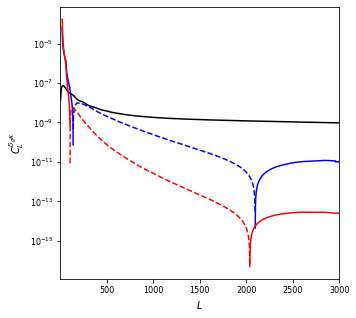

In [6]:
if which_bias=='tsz':
    hm_calc.get_tsz_cross_biases(experiment, survey_name=survey_name)
elif which_bias=='cib':
    hm_calc.get_cib_cross_biases(experiment, survey_name=survey_name)
elif which_bias=='mixed':
    hm_calc.get_mixed_cross_biases(experiment, survey_name=survey_name)

plt.figure(figsize=(5, 5))
scaling = 1

# Split into negative and positive parts for plotting convenience
cross_w_gals_1h_pos, cross_w_gals_1h_neg = tls.split_positive_negative(experiment.biases[which_bias]['cross_w_gals']['1h'])
cross_w_gals_2h_pos, cross_w_gals_2h_neg = tls.split_positive_negative(experiment.biases[which_bias]['cross_w_gals']['2h'])

# Plot the signal clkg
pgm_1h = hm_calc.hcos.get_power_1halo("nfw", survey_name)
pgm_2h = hm_calc.hcos.get_power_2halo("nfw", survey_name)
Pgm = pgm_1h + pgm_2h
ells = np.linspace(2, 3000, 300)
Cls = hm_calc.hcos.C_kg(ells, hm_calc.hcos.zs, hm_calc.hcos.ks, Pgm, gzs=0.8, lzs=1100.)
plt.plot(ells, 0.05 * Cls, 'k')

plt.plot(experiment.biases['ells'], scaling * cross_w_gals_1h_pos, color='b')
plt.plot(experiment.biases['ells'], scaling * cross_w_gals_1h_neg, color='b', ls='--')

plt.plot(experiment.biases['ells'], scaling * cross_w_gals_2h_pos, color='r')
plt.plot(experiment.biases['ells'], scaling * cross_w_gals_2h_neg, color='r', ls='--')

plt.yscale('log')
plt.xlim([2, 3000])
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=8)
plt.ylabel(r'$C_{L}^{\delta_{g}\kappa}$')
plt.xlabel(r'$L$')

# Test the FFTlog implementation of the QE

We now test the FFTlog implementation of the 1D TT QE against a brute-force calculation of the integrals

Generate a y profile

In [10]:
y = tls.pkToPell(hm_calc.hcos.comoving_radial_distance(hm_calc.hcos.zs[1]),hm_calc.hcos.ks,\
                 hm_calc.hcos.pk_profiles['y'][1,1]*(1-np.exp(-(hm_calc.hcos.ks/hm_calc.hcos.p['kstar_damping']))), ellmax=SPT.lmax)

Calculate the (unnormalised) lensing reconstruction by brute force (this can be very slow)

In [11]:
output_ells = np.linspace(20, 3000, 10)

unnorm_rec_bruteforce = SPT.get_brute_force_unnorm_TT_qe(output_ells,y)

dealing with integrable singularity by setting to 0
dealing with integrable singularity by setting to 0
dealing with integrable singularity by setting to 0
dealing with integrable singularity by setting to 0
dealing with integrable singularity by setting to 0
dealing with integrable singularity by setting to 0
dealing with integrable singularity by setting to 0
dealing with integrable singularity by setting to 0
dealing with integrable singularity by setting to 0
dealing with integrable singularity by setting to 0
dealing with integrable singularity by setting to 0
dealing with integrable singularity by setting to 0
dealing with integrable singularity by setting to 0


Now calculate it using FFTlog

In [101]:
output_ells_refined =  np.arange(3000)

# FFTlog parameters
N_l= 2*4096#2*4096
lmin= .000135 #0.000135
alpha= -1.35#-1.35

unnorm_rec_fftlog = SPT.get_unnorm_TT_qe(output_ells_refined,y, N_l=N_l, lmin=lmin, alpha=alpha)

Compare the two

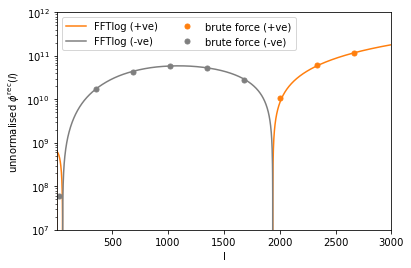

In [102]:
plt.semilogy(output_ells_refined, unnorm_rec_fftlog, color='tab:orange', label='FFTlog (+ve)')
plt.semilogy(output_ells_refined, - unnorm_rec_fftlog, color='tab:gray', label='FFTlog (-ve)')

plt.semilogy(output_ells, unnorm_rec_bruteforce, marker='o', lw=0, markersize=5, color='tab:orange', label='brute force (+ve)')
plt.semilogy(output_ells, -unnorm_rec_bruteforce, marker='o', markersize=5, lw=0, color='tab:gray', label='brute force (-ve)')

plt.xlim([1, 3000])
plt.ylim([1e7, 1e12])
plt.xlabel('l')
plt.ylabel(r'unnormalised $\phi^{\mathrm{rec}} (l)$')
plt.legend(loc='upper left', ncol=2)


# Calculate the biases to B-mode delensing

In [170]:
SO_5e15 = qest.experiment(6., 1.5, 3000, massCut_Mvir=5e15, freq_GHz=freq_GHz)
SO_1e15 = qest.experiment(6., 1.5, 3000, massCut_Mvir=1e15, freq_GHz=freq_GHz)
SO_5e14 = qest.experiment(6., 1.5, 3000, massCut_Mvir=5e14, freq_GHz=freq_GHz)

(-1e-07, 1.5e-07)

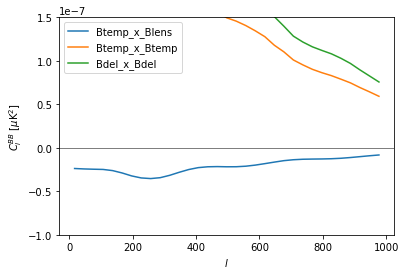

In [171]:
ells, cl_Btemp_x_Blens_bias, cl_Btemp_x_Btemp_bias, cl_Bdel_x_Bdel_bias = hm_calc.get_bias_to_delensed_clbb(SO_5e15)

plt.plot(ells, cl_Btemp_x_Blens_bias, label=r'Btemp_x_Blens')
plt.plot(ells, cl_Btemp_x_Btemp_bias, label=r'Btemp_x_Btemp')
plt.plot(ells, cl_Bdel_x_Bdel_bias, label=r'Bdel_x_Bdel')
plt.ylabel(r'$C_l^{BB}$ [$\mu$K$^2$]')
plt.xlabel(r'$l$')
plt.legend()
plt.axhline(0, color='k', lw=0.5)
plt.ylim([-1e-7,1.5e-7])

(-1e-07, 1.5e-07)

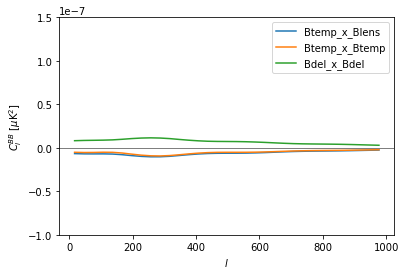

In [172]:
ells, cl_Btemp_x_Blens_bias_SO_1e15, cl_Btemp_x_Btemp_bias_SO_1e15, cl_Bdel_x_Bdel_bias_SO_1e15 = hm_calc.get_bias_to_delensed_clbb(SO_5e14)

plt.plot(ells, cl_Btemp_x_Blens_bias_SO_1e15, label=r'Btemp_x_Blens')
plt.plot(ells, cl_Btemp_x_Btemp_bias_SO_1e15, label=r'Btemp_x_Btemp')
plt.plot(ells, cl_Bdel_x_Bdel_bias_SO_1e15, label=r'Bdel_x_Bdel')
plt.ylabel(r'$C_l^{BB}$ [$\mu$K$^2$]')
plt.xlabel(r'$l$')
plt.legend()
plt.axhline(0, color='k', lw=0.5)
plt.ylim([-1e-7,1.5e-7])

(-1e-07, 1.5e-07)

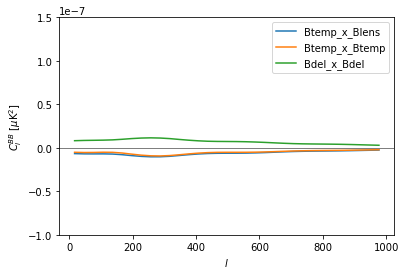

In [173]:
ells, cl_Btemp_x_Blens_bias_SO_5e14, cl_Btemp_x_Btemp_bias_SO_5e14, cl_Bdel_x_Bdel_bias_SO_5e14 = hm_calc.get_bias_to_delensed_clbb(SO_5e14)

plt.plot(ells, cl_Btemp_x_Blens_bias_SO_5e14, label=r'Btemp_x_Blens')
plt.plot(ells, cl_Btemp_x_Btemp_bias_SO_5e14, label=r'Btemp_x_Btemp')
plt.plot(ells, cl_Bdel_x_Bdel_bias_SO_5e14, label=r'Bdel_x_Bdel')
plt.ylabel(r'$C_l^{BB}$ [$\mu$K$^2$]')
plt.xlabel(r'$l$')
plt.legend()
plt.axhline(0, color='k', lw=0.5)
plt.ylim([-1e-7,1.5e-7])